In [11]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data

In [6]:
from keras.datasets import fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


In [8]:
X_train.shape, X_valid.shape

((55000, 28, 28), (5000, 28, 28))

In [10]:
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

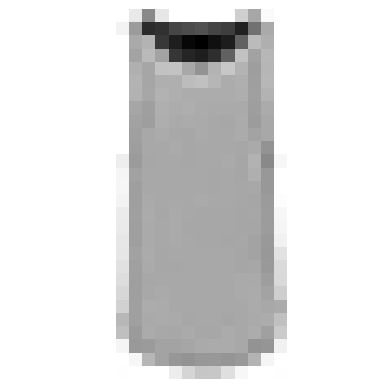

In [17]:
plt.imshow(X_train[2], cmap="binary")
plt.axis('off')
plt.show()

In [16]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", 
               "Dress", "Coat", "Sandal", "Shirt",
               "Sneaker", "Bag", "Ankle boot"]

# Creating model using squential API

## Creating model

In [20]:
X_train[0].shape

(28, 28)

In [22]:
tf.keras.backend.clear_session()

tf.random.set_seed(2024)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,810 (1.21 MB)

 Trainable params: 316,810 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

### Parameter initialzation

In [25]:
hidden1 = model.layers[1]

In [26]:
weights, biases = hidden1.get_weights()
weights, biases

(array([[ 0.01338873,  0.03766175, -0.01252761, ...,  0.03047379,
         -0.00159467,  0.01276261],
        [-0.07113744, -0.05834424, -0.06998666, ...,  0.03652415,
          0.05943455, -0.06188065],
        [-0.03500862,  0.04387356,  0.07376474, ..., -0.07393873,
          0.05042061, -0.060614  ],
        ...,
        [-0.07374587, -0.03589813, -0.0739674 , ..., -0.0316043 ,
          0.04649477,  0.01147689],
        [-0.02529258,  0.04644134,  0.00292421, ..., -0.02982108,
         -0.06667545, -0.07048611],
        [ 0.07021043,  0.01706937, -0.04202419, ..., -0.07341038,
          0.04419345,  0.02432512]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

## Compiling the model

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
    optimizer = 'sgd',
    metrics = ["accuracy"]
)

## Training and testing the model

In [29]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data = (X_valid, y_valid))

Epoch 1/30


2024-04-02 17:17:42.553065: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6701 - loss: 1.0210 - val_accuracy: 0.8264 - val_loss: 0.4989
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8280 - loss: 0.4932 - val_accuracy: 0.8444 - val_loss: 0.4463
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8484 - loss: 0.4375 - val_accuracy: 0.8518 - val_loss: 0.4153
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8595 - loss: 0.4048 - val_accuracy: 0.8600 - val_loss: 0.3941
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8670 - loss: 0.3813 - val_accuracy: 0.8652 - val_loss: 0.3775
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8731 - loss: 0.3626 - val_accuracy: 0.8698 - val_loss: 0.3649
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8773 - loss: 0.3472 - val_accuracy: 0.8724 - val_loss: 0.3556
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8816 - loss: 0.3339 - val_accurac